<a href="https://colab.research.google.com/github/suhyeon03/DeepLearning/blob/main/ch5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오차역전파

계산 그래프

* 계산 그래프는 계산 과정을 그래프로 나타낸 것이다. 그래프는 그래프 자료 구조로 복수의 노드와 에지로 표현된다.

* 계산 그래프는 계산 과정을 노드와 화살표로 표현한다. 노드는 원으로 표기하고 원 안에 연산 내용을 적는다.

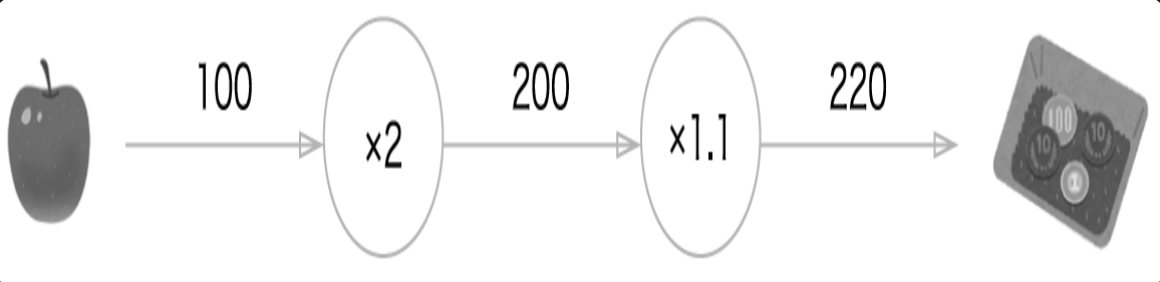

*  x2와 x1.1을 각각 하나의 연산으로 취급해 원 안에 표기했지만 곱셈인 x만 연산으로 생각할 수도 있다.
* 그렇게 되면 그림 5-2처럼 2와 1.1은 각각 사과의 개수와 소비세 변수가 되어 원 밖에 표기하게 된다.

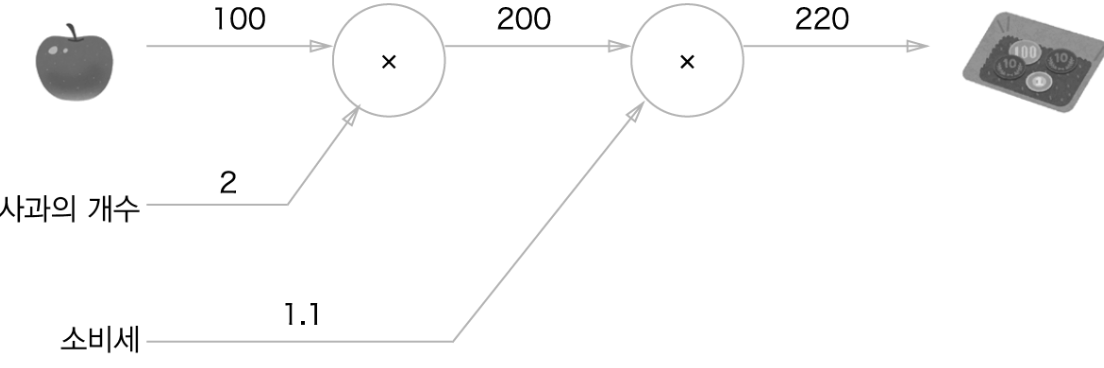

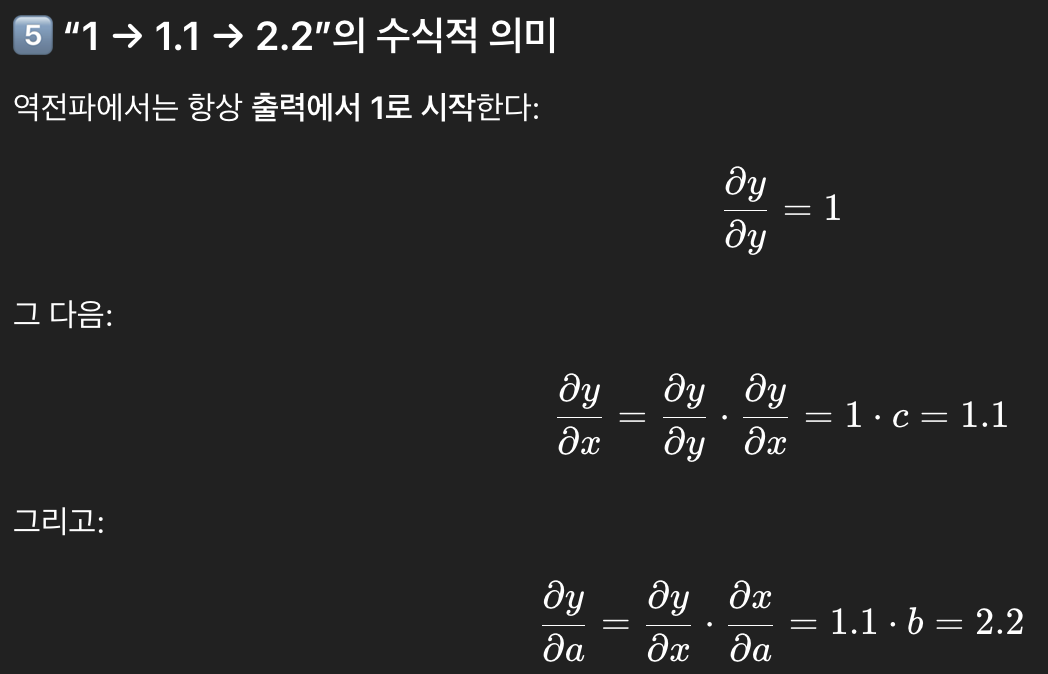

* 계산 그래프는 왼쪽에서 오른쪽으로 계산을 진행하며 이를 순전파라고 한다.

* 반대 방향의 전파는 역전파라고 하며 이후에 미분을 계산할 때 중요한 역할을 하게 된다.

연쇄법칙

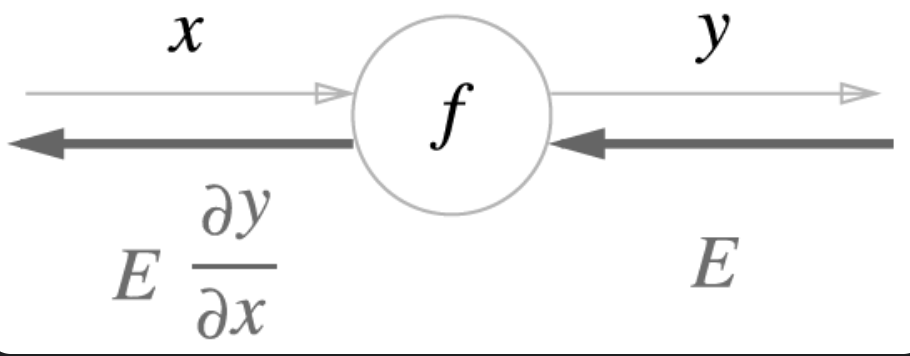

* 역전파의 계산 절차는 신호 E에 노드의 국소적 미분을 곱한 후 다음 노드로 전달하는 것이다.
* 국소적 미분은 순전파 때의 y=f(x) 계산의 미분을 구한다는 것이며 x에 대한 y의 미분을 구한다는 뜻이다.

* 이 국소적인 미분을 상류에서 전달된 값에 곱해 앞쪽 노드로 전달하는 것이다.

  * x가 y에 얼마나 영향을 줬는지에 따라
   * 오차를 줄이거나 키워야 하기 때문
    * 그래서 미분값을 곱함

* 국소적 계산의 이점
  * 각 노드에서는 단순한 계산에 집중하여 문제를 단순화할 수 있다.
  * 계산 그래프는 중간 계산 결과를 모두 보관할 수 있다.
  * 역전파를 통해 미분을 효율적으로 계산할 수 있다.

* 합성 함수란 여러 함수로 구성된 함수이다.

* 연쇄 법칙은 합성 함수의 미분에 대한 성질이며 다음과 같이 정의된다.

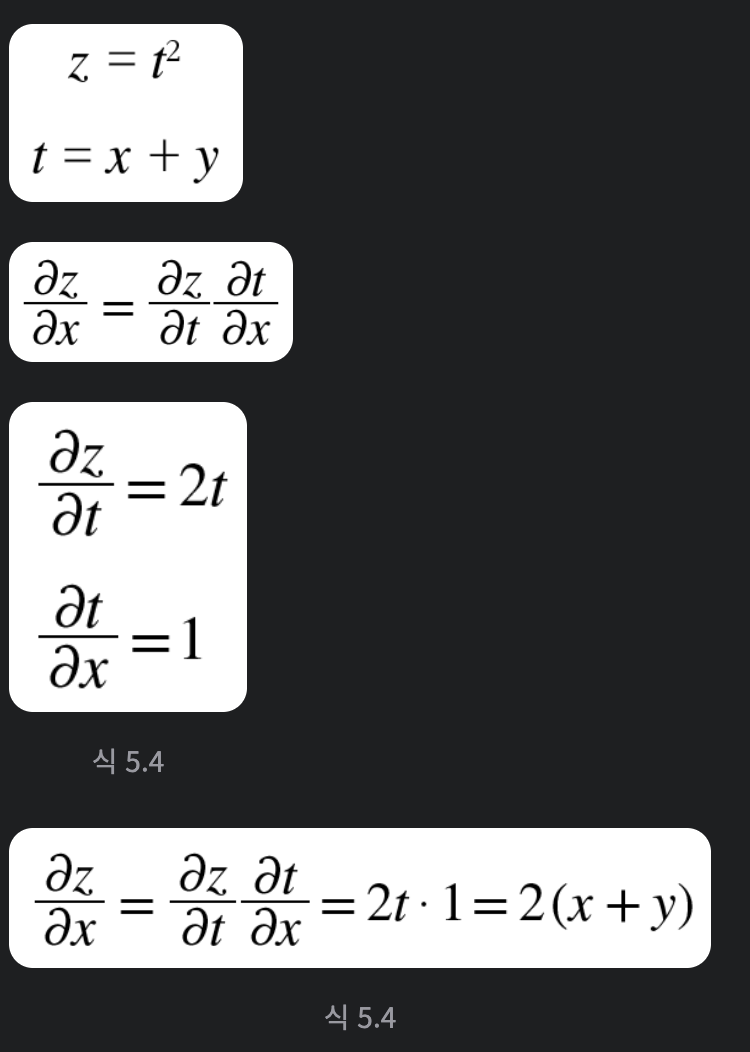

* 연쇄법칙 계산을 계산 그래프로 나타내면 다음과 같다

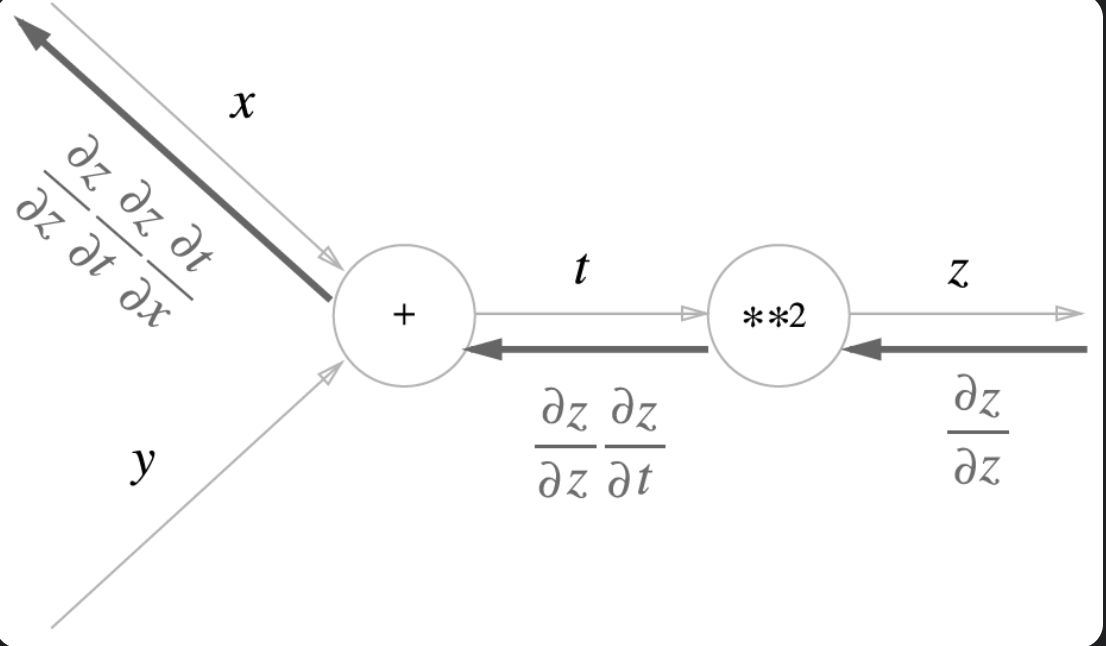

* 역전파는 ∂z/∂z 에서 시작되고 기준 신호가 된다.
* 다음 노드인 제곱노드에선 z = t**2이고, ∂t / ∂z =2t가 된다.
* 다음 노드인 덧셉노드에서는 ∂x/∂t​=1,∂y/∂t​=1



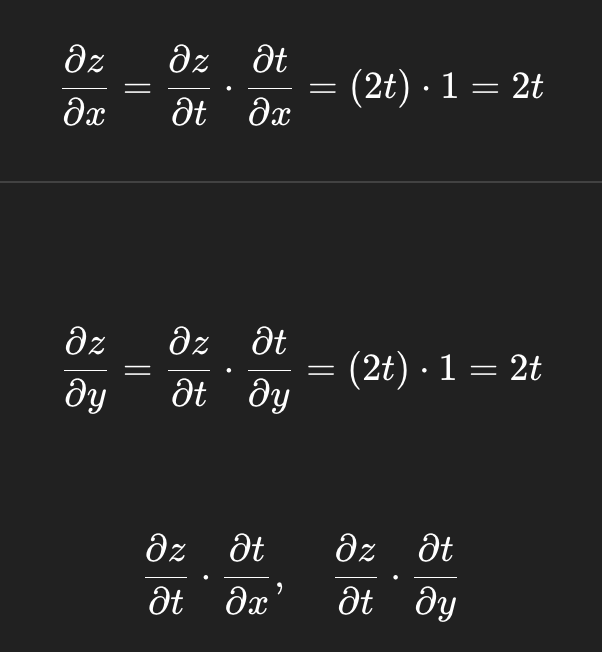

* 역전파의 계산 절차에서는 노드로 들어온 입력 신호에 그 노드의 국소적 미분(편미분)을 곱한 후 다음 노드로 전달된다.

* 즉, 역전파가 하는 일은 연쇄 법칙의 원리와 같다는 것이다.

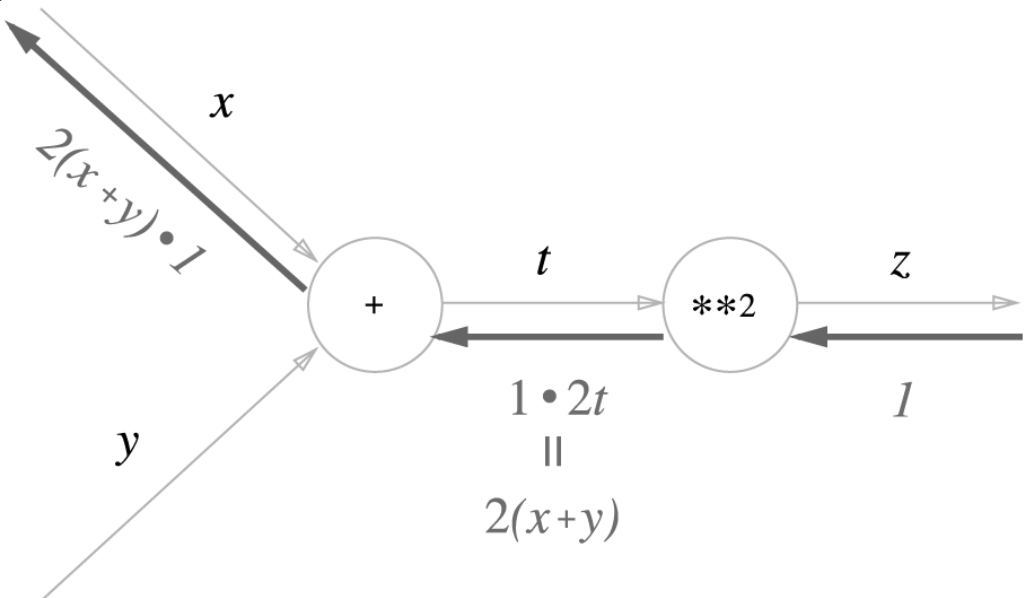

덧셈 노드에서의 계산 (다시정리)

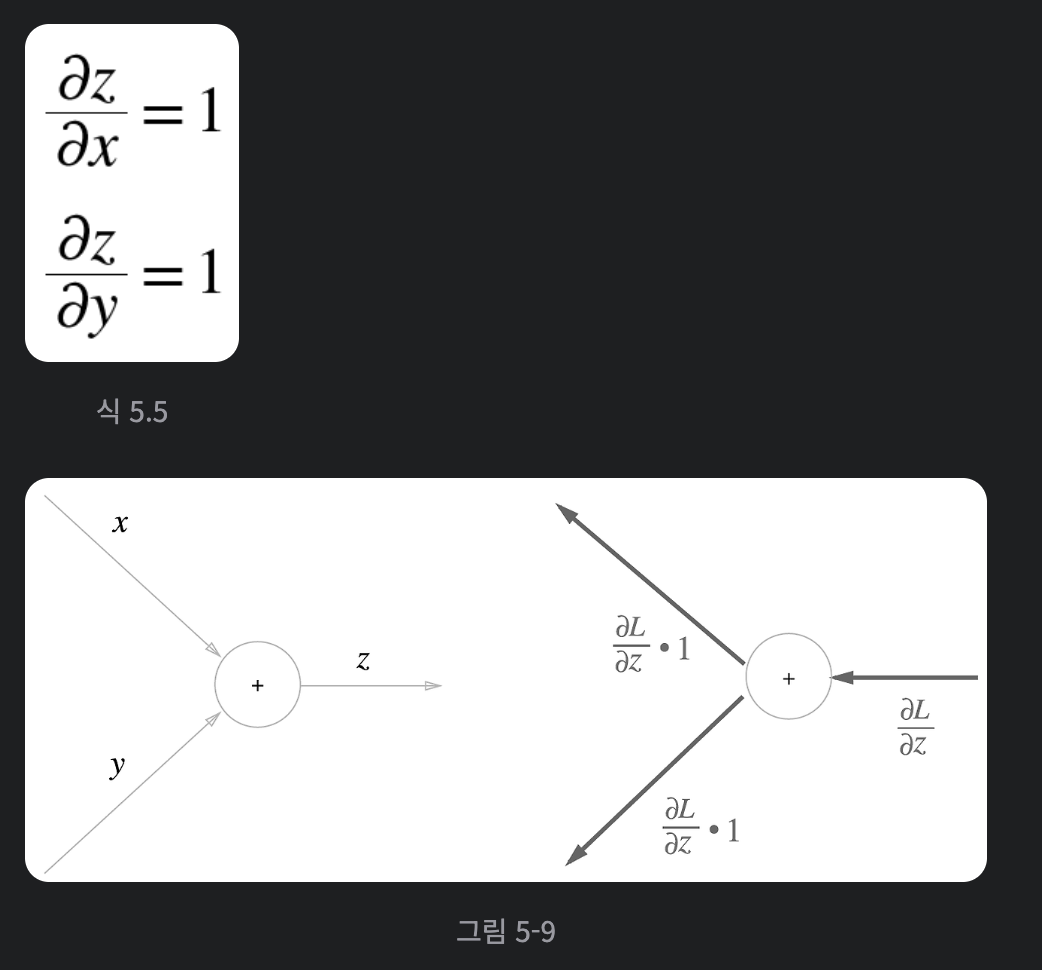

* 덧셈 노드의 역전파는 1을 곱하기만 할 뿐 입력된 값을 그대로 다음 노드로 보내게 된다.
* 최종 출력으로 가는 계산의 중간게 덧셈 노드가 존재한다. 역전파에서는 국소적 미분이 가장 오른쪽의 출력에서 시작하여 노드를 타고 역방향으로 전파 된다.

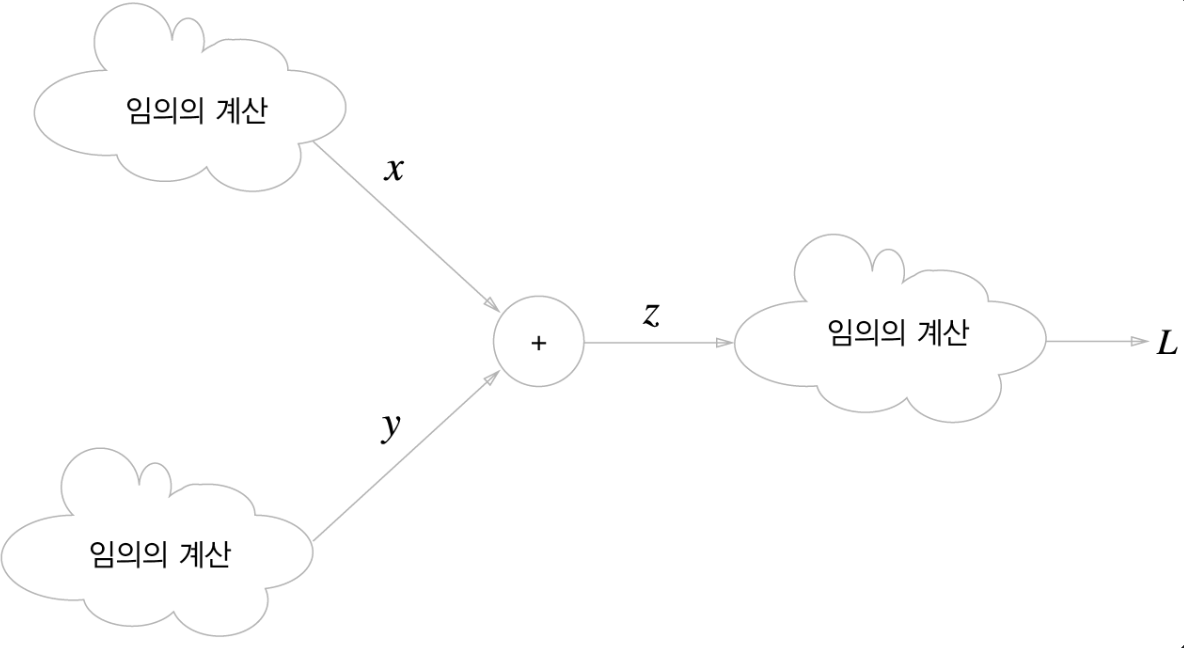

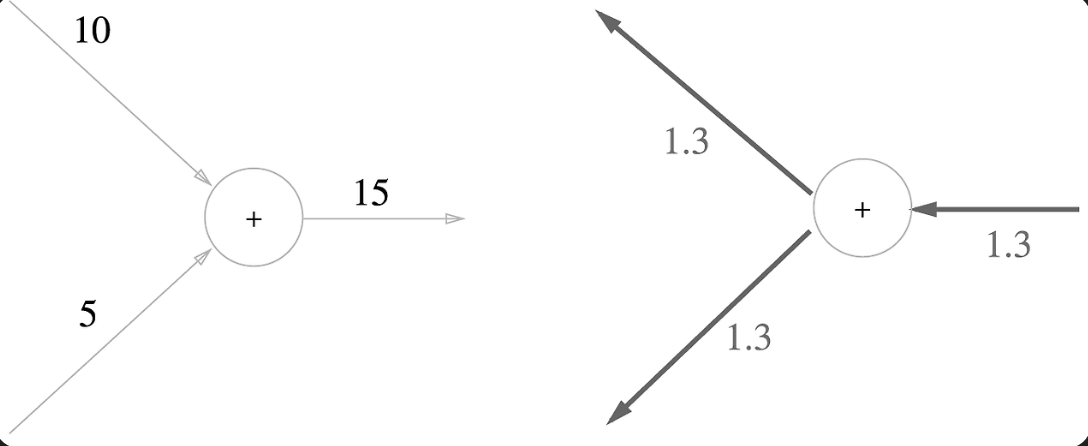

곱셉 노드에서의 계산 (다시 정리)

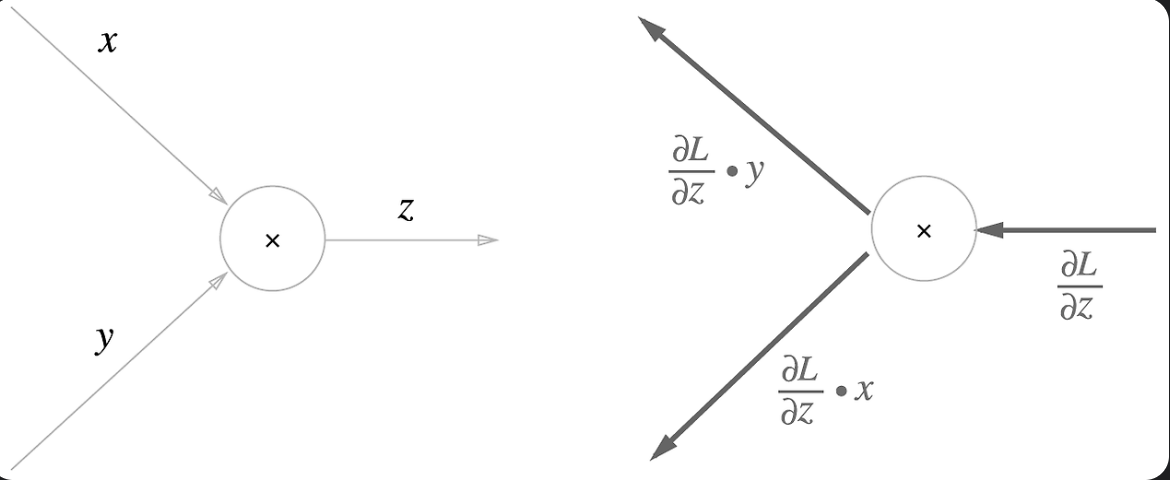

* 곱셈 노드 역전파는 상류의 값에 순전파 때의 입력 신호들을 서로 바꾼 값을 곱해서 하류로 보낸다.

* 순전파 때 x였다면 역전파에서는 y, 순전파 때 y였다면 역전파에서는 x로 바꾼다는 의미이다.

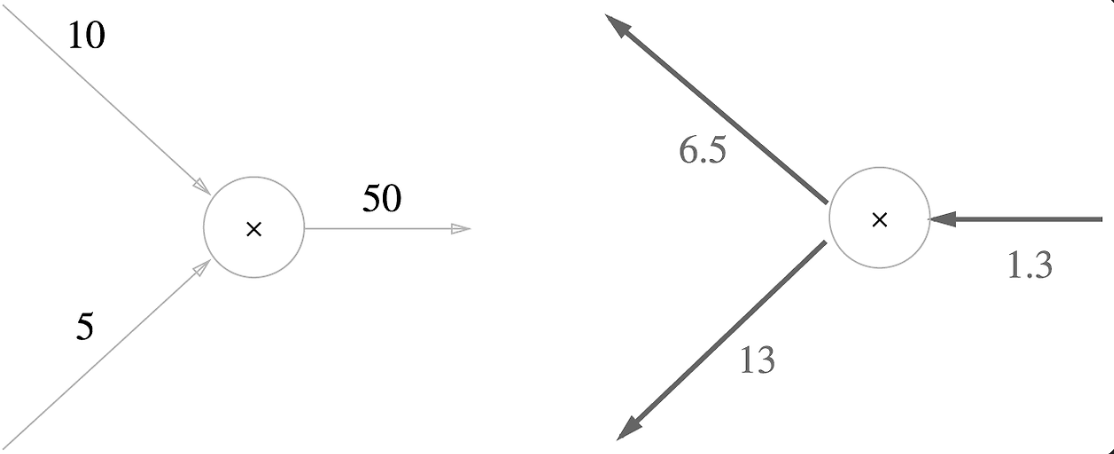

* 곱셈의 역전파는 순방향 입력 신호의 값이 필요하다. 그래서 곱셈 노드를 구현할 때는 순전파의 입력 신호를 변수에 저장 해 둔다.

중간 정리

* “덧셈 연산은 역전파에서
기울기를 그대로 복사해
모든 입력으로 보낸다”

* 곱셈 노드의 역전파는
상류에서 온 기울기에
‘자기 말고 반대편 입력값’을 곱해
각 입력으로 전달하는 것이다.

이해를 위한 질문

1. 왜 bias는 gradient가 그냥 합으로 쌓이는가
* 아래처럼 결국 1이된다. 그래서 미니배치일떄도 bias gradient는 합이다.

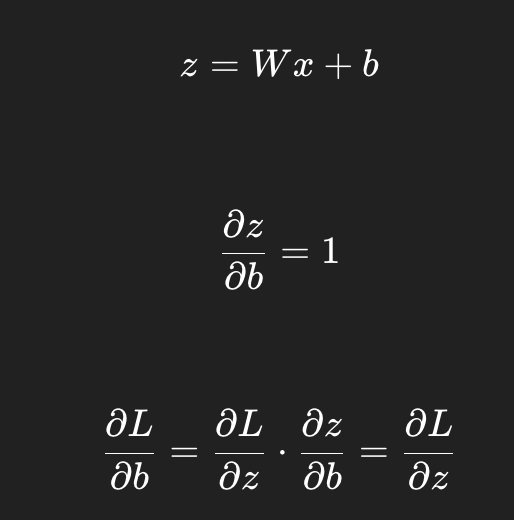

* 신경망에서 학습이 잘 되느냐는, 역전파 중 기울기가 덧셈으로는 그대로 흐르고 곱셈으로는 커지거나 작아지기 때문에, 가중치·입력의 스케일을 초기화와 정규화로 적절히 제어해 주느냐에 달려 있다.

2. vanishing / exploding gradient란?

* 역전파에서 기울기(gradient)가
층을 거치며 계속 곱해지다가
  * 0에 가까워지면 vanishing,(기울기 소실)
  * 무한히 커지면 exploding(기울기 폭발)이 된다.

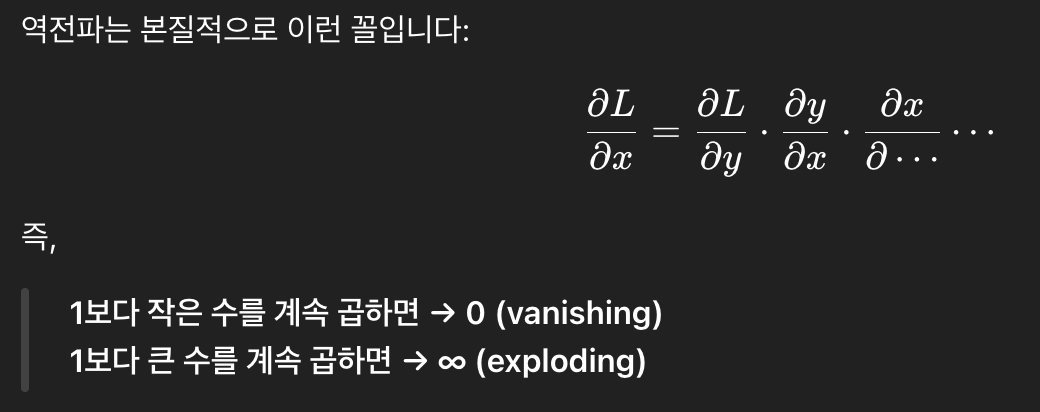

* vanishing gradient (기울기 소실)

  * 주 원인: sigmoid, tanh (미분 ≤ 1), 깊은 네트워크

  * 결과: 앞쪽 레이어가 거의 안 배움, 학습이 멈춘 것처럼 보임

  * 직관: “뒤에서 온 오차가 앞까지 도달하기 전에 다 사라짐”

* exploding gradient (기울기 폭발)

  * 주 원인: 큰 가중치, 큰 입력 스케일, 깊은 곱셈 구조

  * 결과: loss가 NaN / inf, 가중치가 한 번에 터짐

  * 직관: “작은 오차가 앞쪽에서 과도하게 증폭됨”

* 왜 덧셈(ResNet)은 안전한가?

  * 덧셈 노드 미분 = 1

  * 곱셈 연쇄를 만들지 않음

  * 그래서: gradient가 최소 1 경로를 항상 가짐

 # 단순한 계층 구현하기

* 사과 쇼핑을 예로 구현

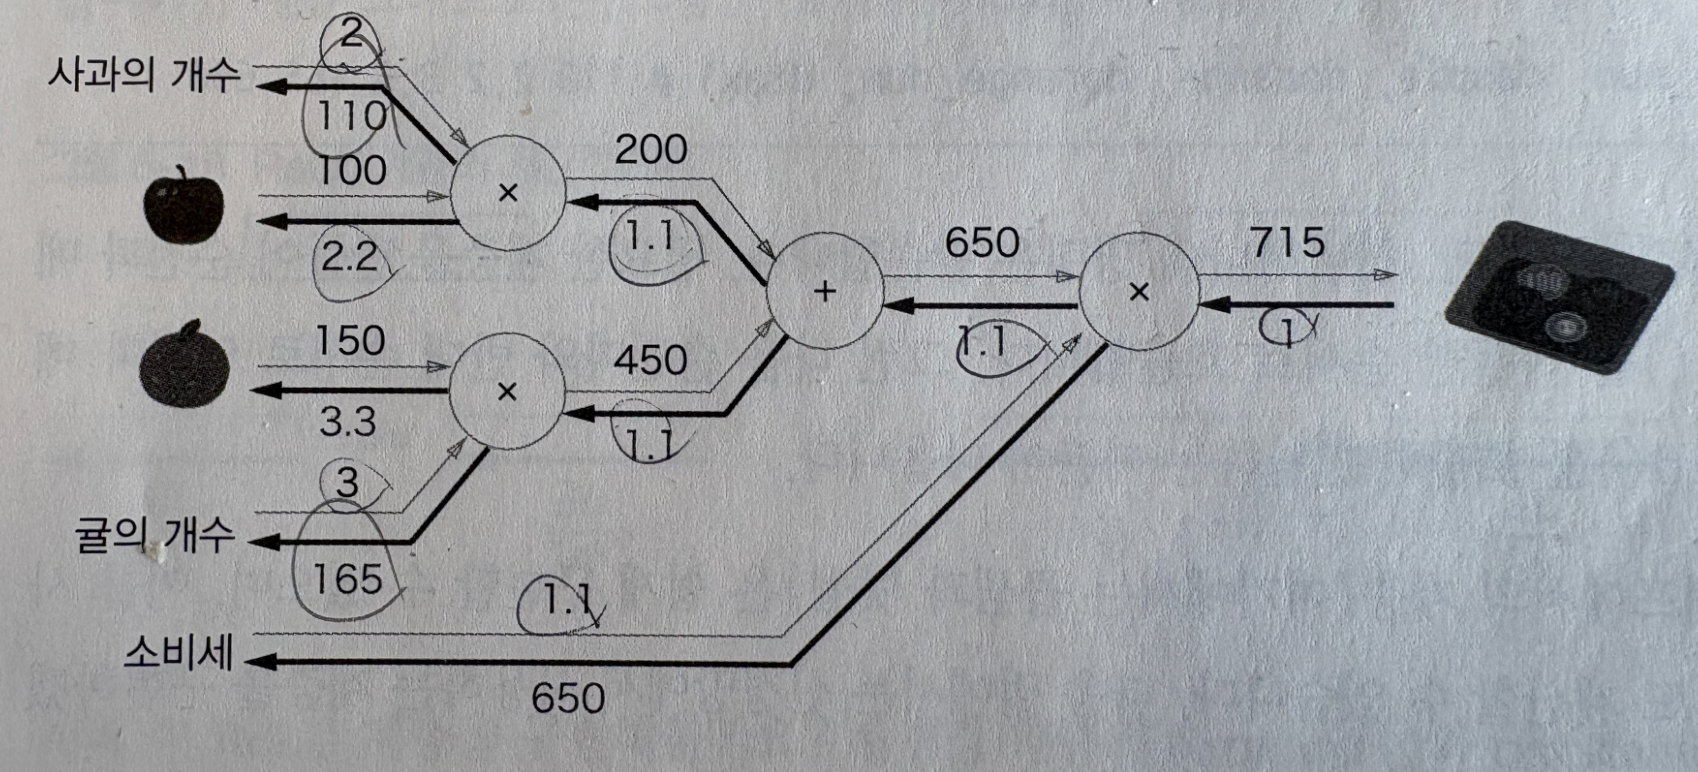

곱셈 계층

* __init__()에서는 인스턴스 변수인 x와y를 초기화한다. 이 변수들은 순전파 시의 입값을 유지하기위해 사용한다.
* forward()에서는 x와 y를 인수로 받고 두 값을 굽해서 반환한다.
* backward()에서는 상류에서 넘어온 미분(dout)에 순전파 때의 값을 서로 바꿔 곱한 후 하류로 흘린다.

In [1]:
class MulLayer:
  def __init__(self):
      self.x = None
      self.y = None

  def forward(self, x, y):
      self.x = x
      self.y = y
      out = x * y

      return out

  def backward(self, dout):
      dx = dout * self.y # x와 y를 바꾼다.
      dy = dout * self.x

      return dx, dy

In [2]:
apple = 100
apple_num = 2
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [3]:
# 역전파
dprice = 1
dapple_price, dtax = mul_tax_layer.backward(dprice)
dapple_price, dapple_num = mul_apple_layer.backward(dapple_price)

print(dapple_price, dapple_num, dtax)
# backward()가 받는 인수는 '순전파의 출력에대한 미분'이다.

2.2 110.00000000000001 200


덧셈계층

* 덧셈계층에서는 초기화가 필요없다. 학습x, 단지 계층의 출력
* forward()에서는 입력받은 두 인수 x,y를 더해서 반환한다. backward()에서는 상류에서 내려온 미분을 그대로 하류로 흘린다.

In [4]:
class AddLayer:
    def __init__(self):
        pass
    def forward(self, x, y):
        out = x + y
        return out
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

In [5]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# 계층들
mul_apple_layer = MulLayer()
mul_orange_layer = MulLayer()
add_apple_orange_layer = AddLayer()
mul_tax_layer = MulLayer()

# 순전파
apple_price = mul_apple_layer.forward(apple, apple_num) #1
orange_price = mul_orange_layer.forward(orange, orange_num) #2
all_price = add_apple_orange_layer.forward(apple_price, orange_price) #3
price = mul_tax_layer.forward(all_price, tax) #4

# 역전파
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice) #4
dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price) #3
dorange, dorange_num = mul_orange_layer.backward(dorange_price) #2
dapple_num, dapple = mul_apple_layer.backward(dapple_price) #1

print(price)
print(dapple_num, dapple, dorange, dorange_num, dtax)

715.0000000000001
2.2 110.00000000000001 3.3000000000000003 165.0 650


# 활성화 함수 계층구현하기

 ReLU 계층

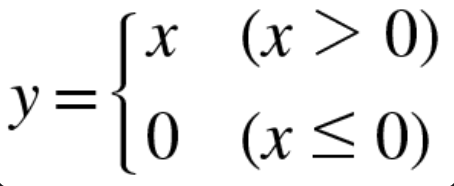

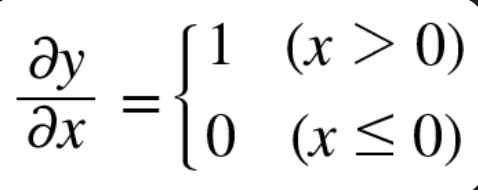

In [6]:
class Relu:
    def __init__(self):
        self.mask = None

    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        return out

    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout

        return dx

* Relu는 mask라는 인스턴스 변수를 가진다.
* mask는 True/False로 구성된 넘파이 배열로, 순전파의 입력인 x의 원소 값이 0 이하인 인덱스는 True, 그외(0보다 큰 원소)는 False로 유지한다.

In [7]:
import numpy as np
x = np.array([[1,-0.5], [-2.0, 3.0]])
print(x)

[[ 1.  -0.5]
 [-2.   3. ]]


In [8]:
mask = (x <= 0)
print(mask)

[[False  True]
 [ True False]]


sigmoid 계층

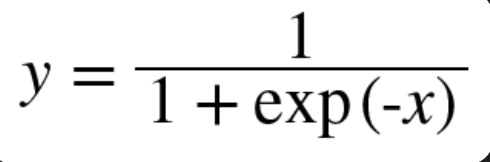

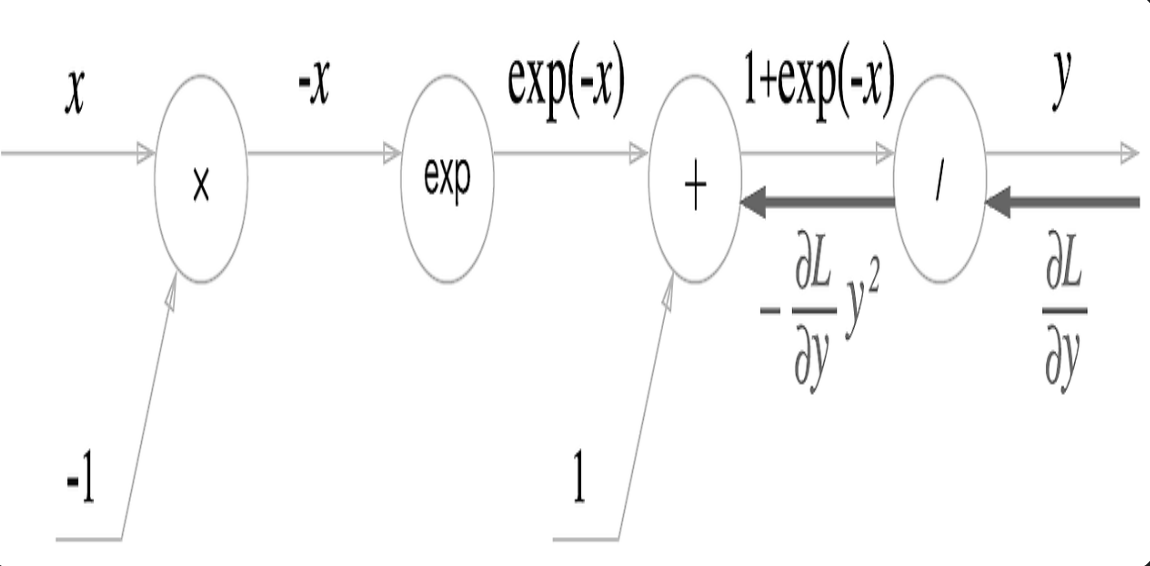

* x와 + 노드 말고도 exp와 / 노드가 새롭게 등장했다.
* exp노드는 y=exp(x) 계산을 수행하고 / 노드는  계산을 수행한다.
* / 노드, y=1/x를 미분하면 다음 식이 된다.

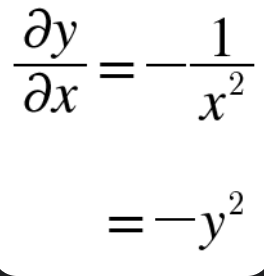

이해를 위해 쪼개서 보자
위도 마찬가지로 사실상 분모 전체를 x로 두고 설명했다.

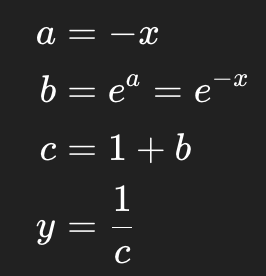

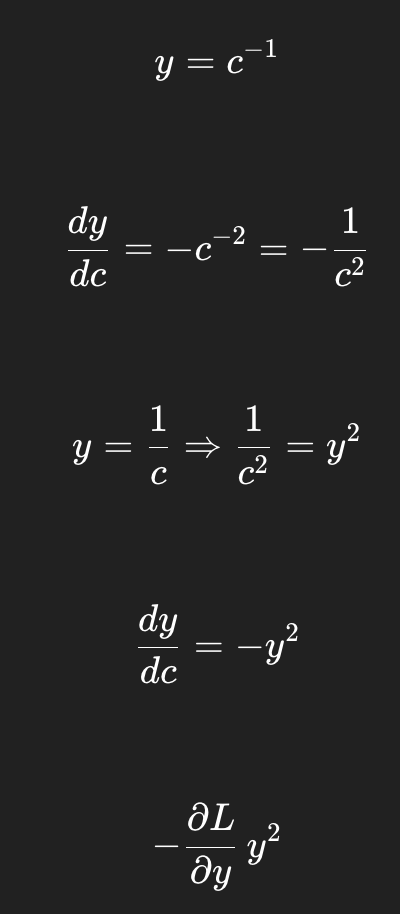

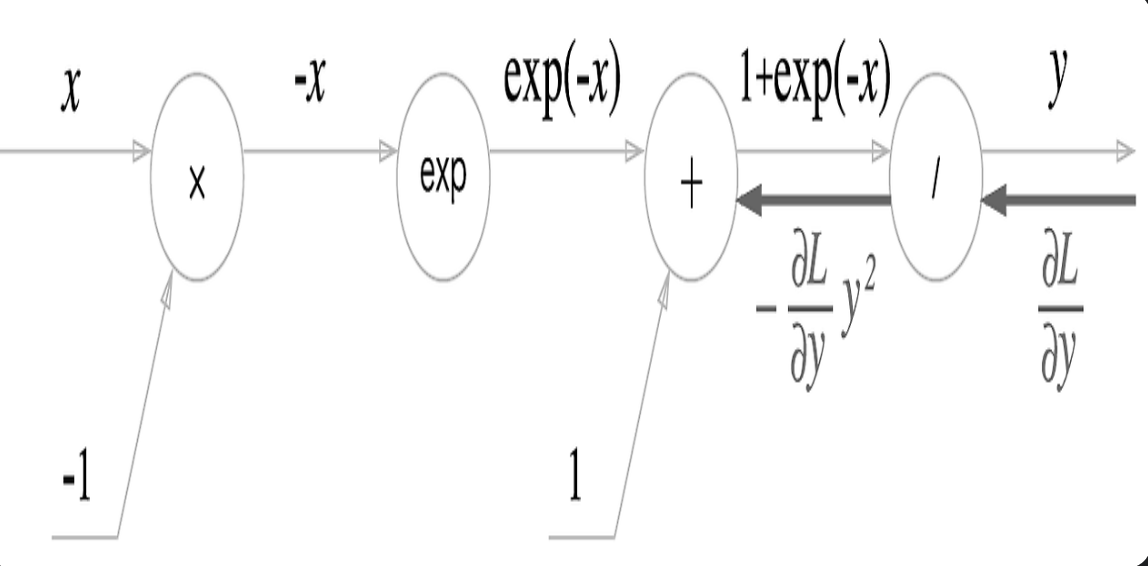

* +노드는 상류의 값을 여과없이 하류로 내보낸다.

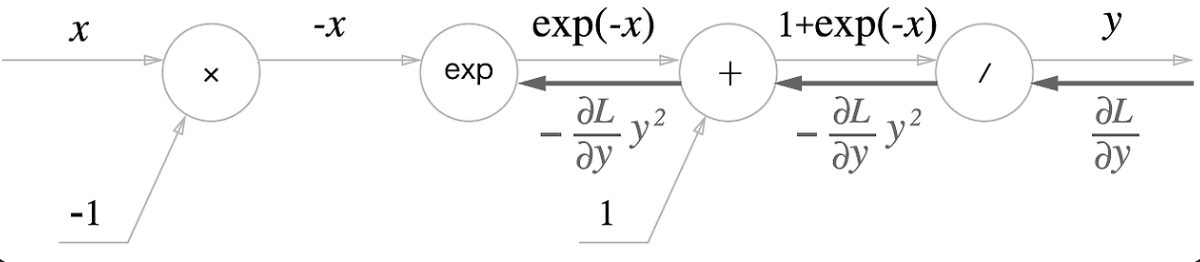

* exp 노드는 y=exp(x)연산을 수행하며 미분은 아래와 같다.

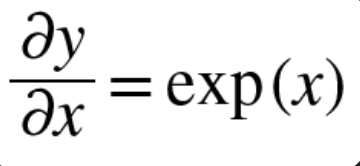

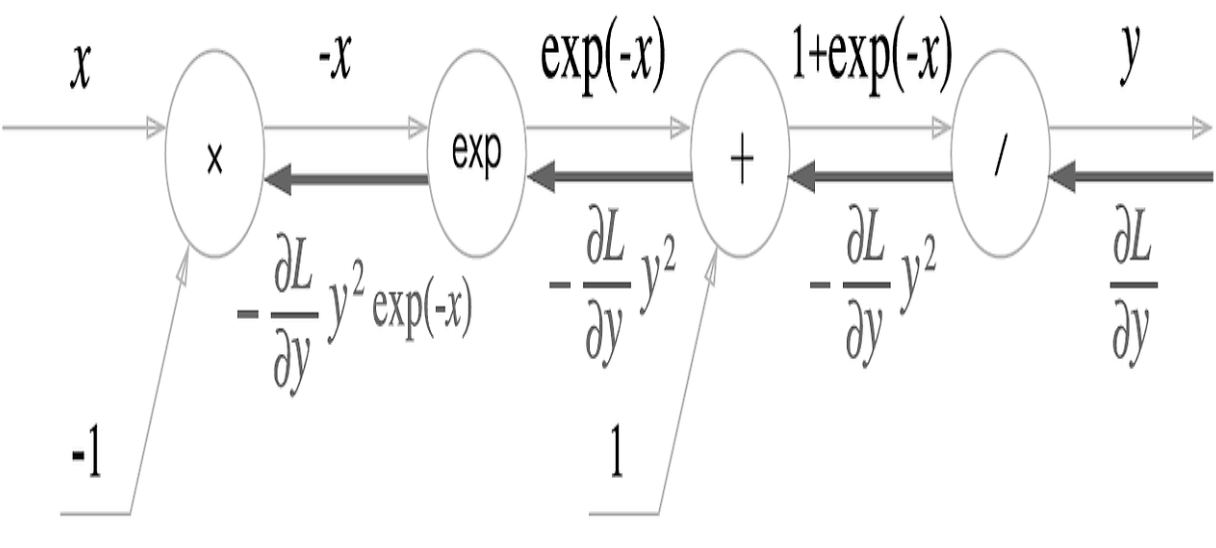

* x노드는 순전파 때의 값을 서로 바꿔 곱한다.

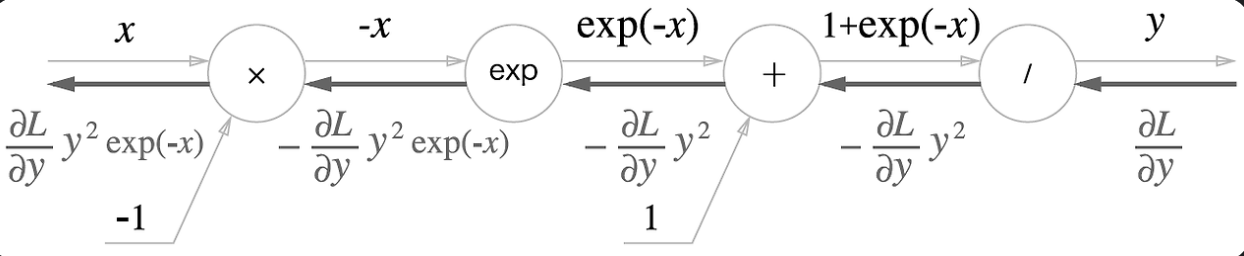

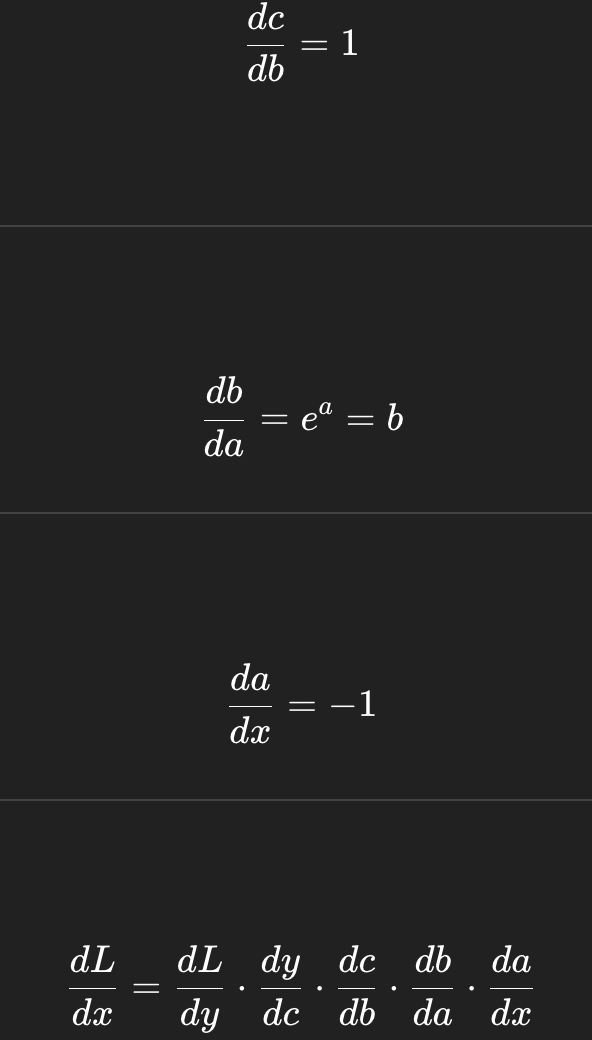

* 계산 그래프의 중간 과정을 모두 묶어 sigmoid 노드 하나로 대체할 수 있다.

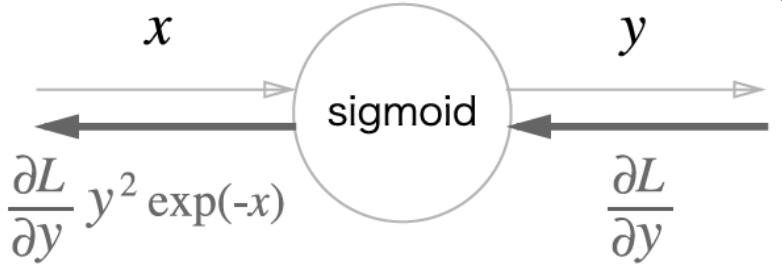

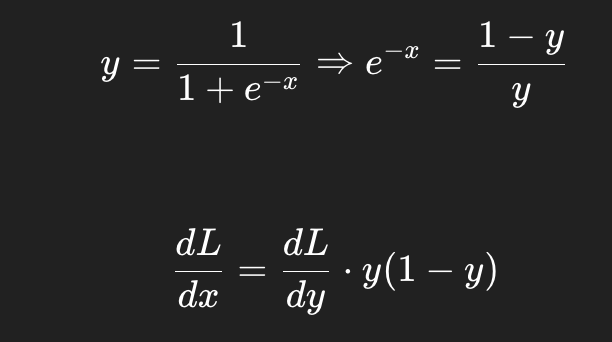

* 간소화 버전은 역전파 과정의 중간 계산들을 생략할 수 있어 더 효율적인 계산이라 말할 수 있다.
* sigmoid 계층의 세세한 내용을 노출하지 않고 입력과 출력에만 집중 할 수 있다.

* 이처럼 sigmoid 계층의 역전파는 순전파의 출력(y)만으로 계산할 수 있다.



In [9]:
class Sigmoid:
    def __init__(self):
        self.out = None

    def forward(self, x):
        out = sigmoid(x)
        self.out = out
        return out

    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out

        return dx

  # 순전파의 출력을 인스턴스 변수 out에 보관했다가, 역전파 계산때 값을 사용한다.

# Affine/Softmax 계층 구현하기


Affine 계층

*   affine은 신경망의 순전파 때 수행하는 행렬의 곱은 기하학에 어파인 변환이라고한다.
* 이 책에서는 어파인 변환하는 처리를 어파인계층이라고한다.

* 신경망의 순전파에서는 가중치 신호의 총합을 계산하기 때문에 행렬곱을 사용했다.

In [10]:
X = np.random.rand(2) # 입력
W = np.random.rand(2,3) # 가중치
B = np.random.rand(3) # 편향

X.shape # (2,)
W.shape # (2,3)
B.shape # (3,)

Y = np.dot(X, W) + B

* 여기에서는 X, W, B는 각각의 형상이 (2,),(2,3),(3,)인 다차원 배열이다.
* 그러면 뉴런의 가중치 합 Y는 저런식으로 계산된다.
* 그리고 이 Y를 활성화 함수로 변환해 다음 층으로 전파하는 것이 신경망 순전파의 흐름이었다.
* 행렬 곱계산은 대응하는 차원의 원소 수를 일치시키는 것이 핵심이였다.

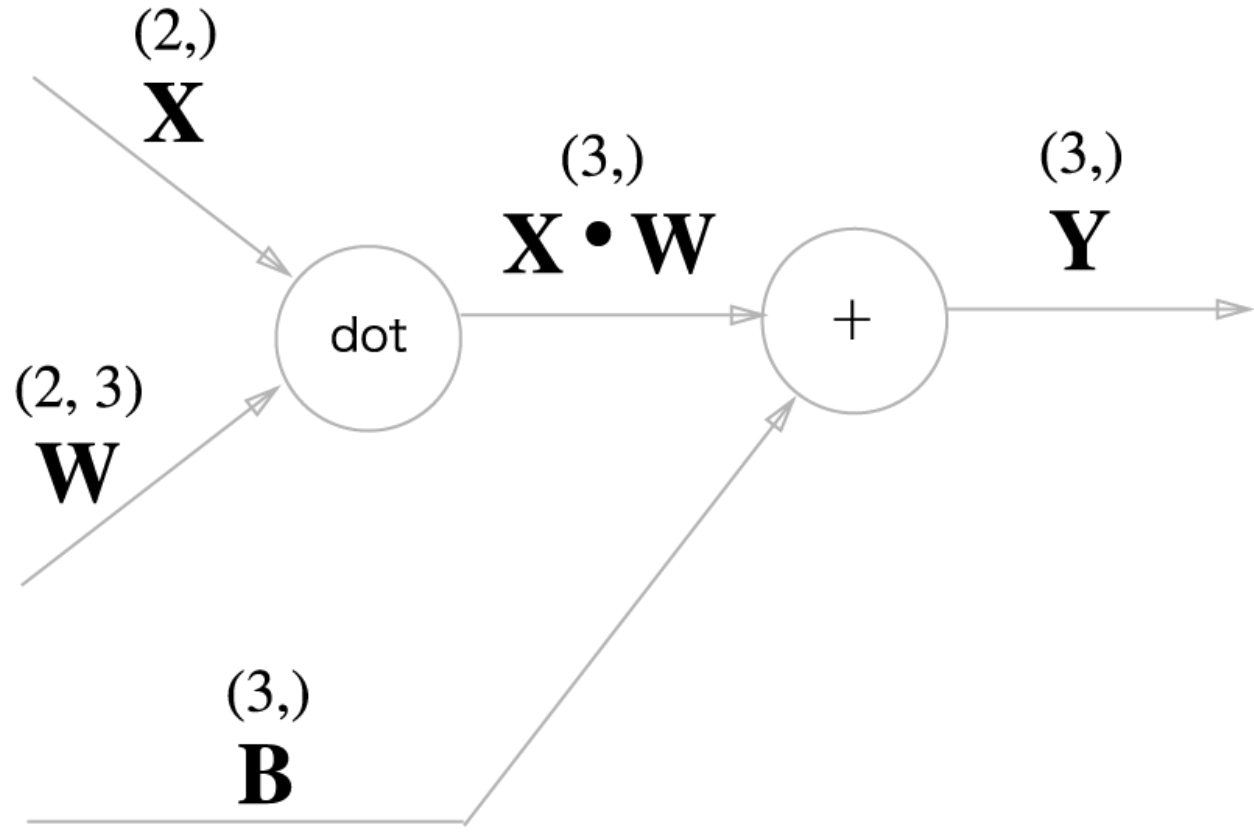

* 비교적 단순한 계산 그래프이다. 단 x, w, b가 행렬이라는 점을 주의해야한다.
* 지금까지의 계산 그래프는 노드 사이의 스칼라값이 흘렀는데 이 예에서는 행렬이 흐른다.

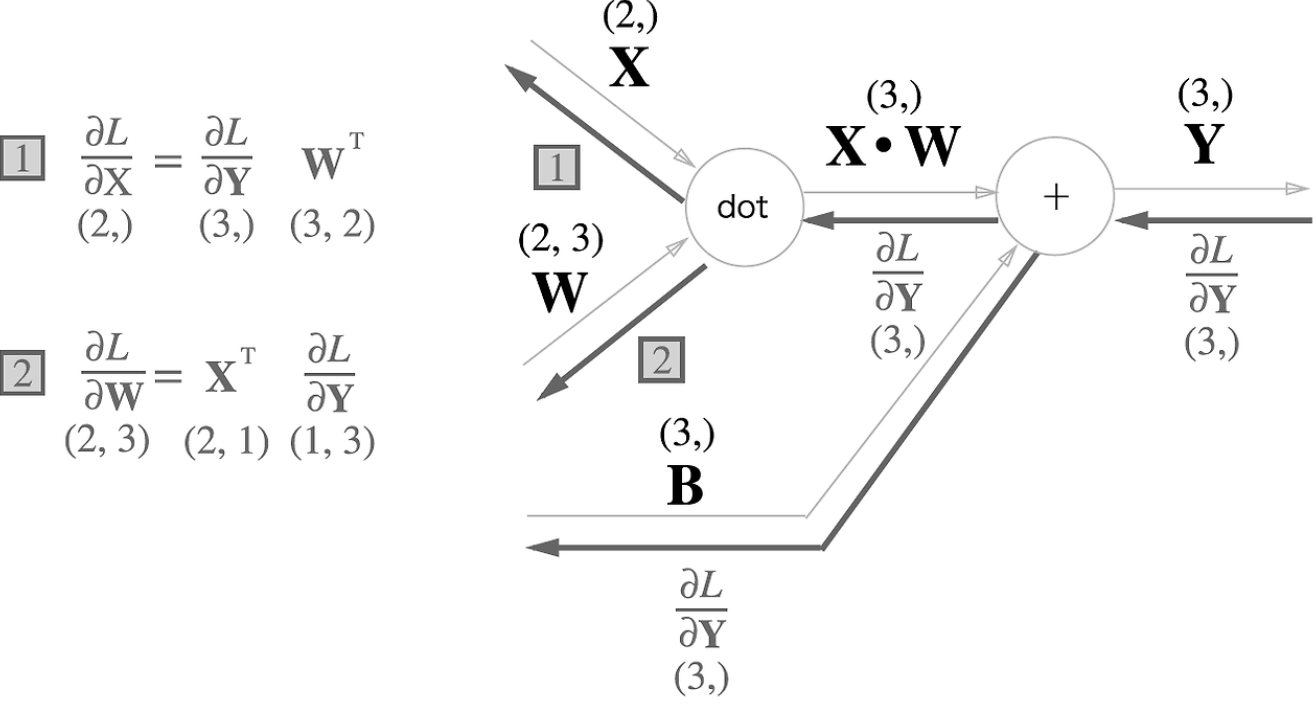

* 참고 : (3,) -> (1,3)인 행백터로 해석
* “X와 ∂L/∂X의 형상이 같다 / W와 ∂L/∂W의 형상이 같다”
  * 어떤 변수에 대한 gradient는
  그 변수와 같은 shape를 가져야 한다.



 배치용 Affine 계층

* 데이터 N개를 묶어 순전파 하는 경우인 배치용 Affine 계층은 아래 그림과 같다.

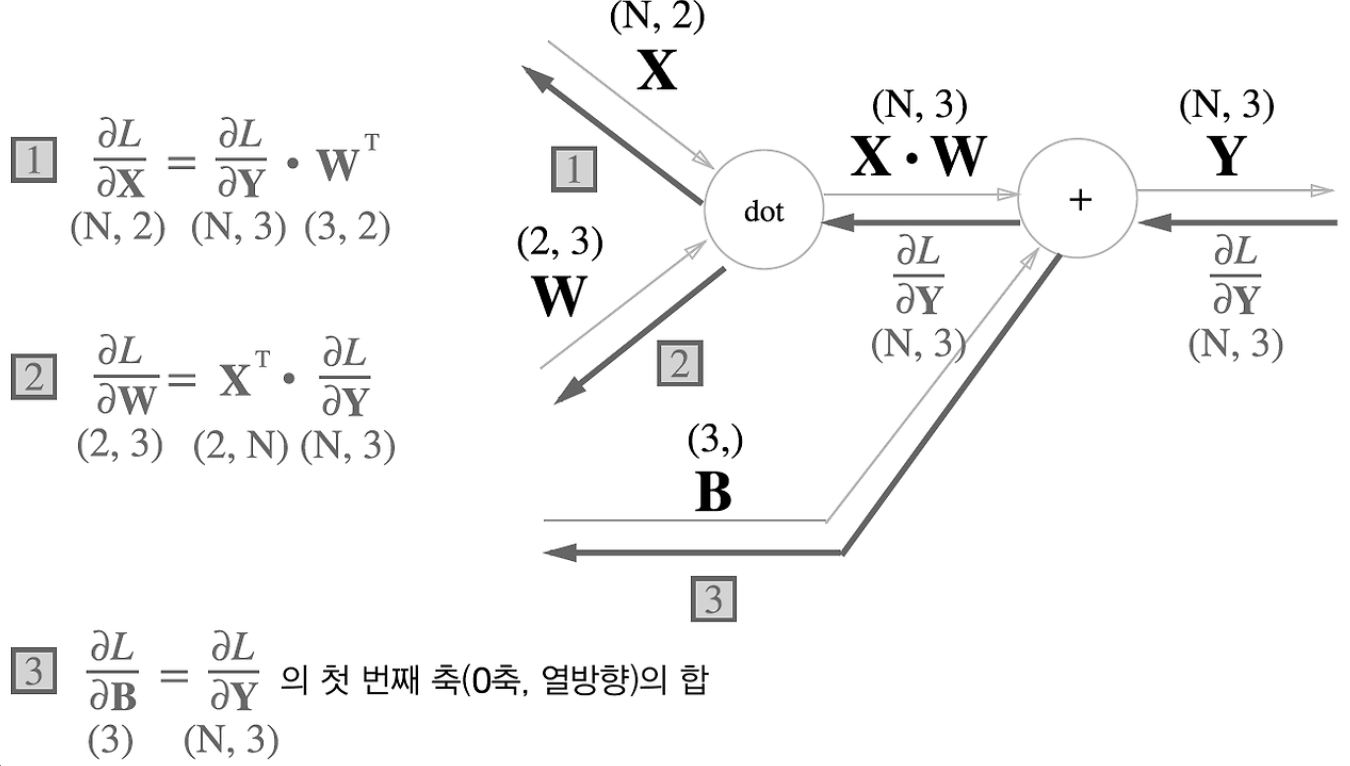

* 순전파의 편향 덧셈에서 주의할 점은 각각의 데이터에 더해지며 역전파 때는 각 데이터의 역전파 값이 편향의 원소에 모여야 한다.



In [11]:
X_dot_W = np.array([[0,0,0],[10,10,10]])
B = np.array([1,2,3])

X_dot_W

array([[ 0,  0,  0],
       [10, 10, 10]])

In [12]:
X_dot_W + B

array([[ 1,  2,  3],
       [11, 12, 13]])

* 편향의 역전파는 그 두 데이터에 대한 미분을 데이터마다 더해서 구한다.



In [13]:
dy = np.array([[1,2,3],[4,5,6]])
dy

array([[1, 2, 3],
       [4, 5, 6]])

In [14]:
dB = np.sum(dy, axis=0)
dB

array([5, 7, 9])

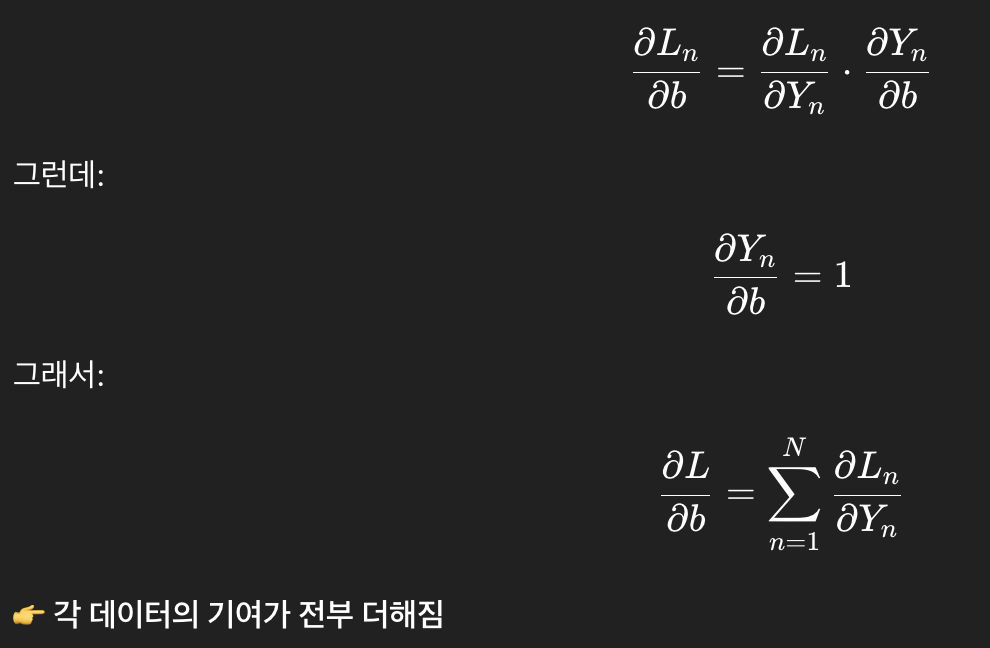

In [15]:
class Affine:
    def __init__(self, W, b):
        self.W = W
        self.b = b

        self.x = None
        self.original_x_shape = None
        # 가중치와 편향 매개변수의 미분
        self.dW = None
        self.db = None

    def forward(self, x):
        # 텐서 대응
        self.original_x_shape = x.shape
        x = x.reshape(x.shape[0], -1)
        self.x = x

        out = np.dot(self.x, self.W) + self.b

        return out

    def backward(self, dout):
        dx = np.dot(dout, self.W.T)
        self.dW = np.dot(self.x.T, dout)
        self.db = np.sum(dout, axis=0)

        dx = dx.reshape(*self.original_x_shape)  # 입력 데이터 모양 변경(텐서 대응)
        return dx

Softmax-with-Loss 계층

* 소프트맥스 함수는 입력 값을 정규화하여 출력한다.

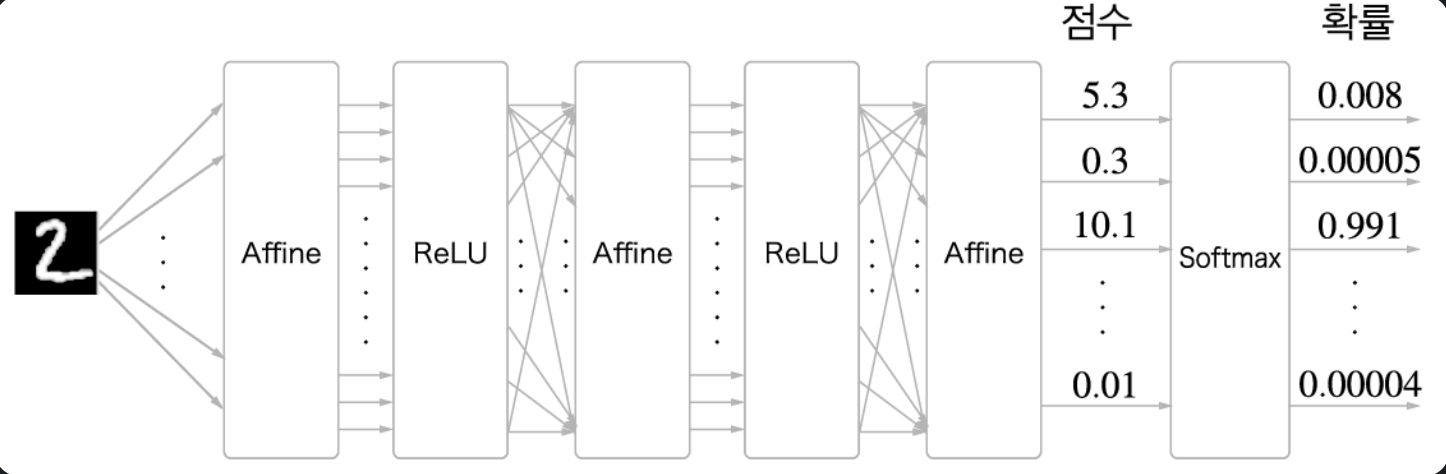

* softmax 계층은 입력 값을 정규화(출력의 합이 1이 되도록 변형)하여 출력한다.

* 손실 함수인 교차 엔트로피 오차도 포함하여 softmax-with-loss 계층이라는 이름으로 구현한다.

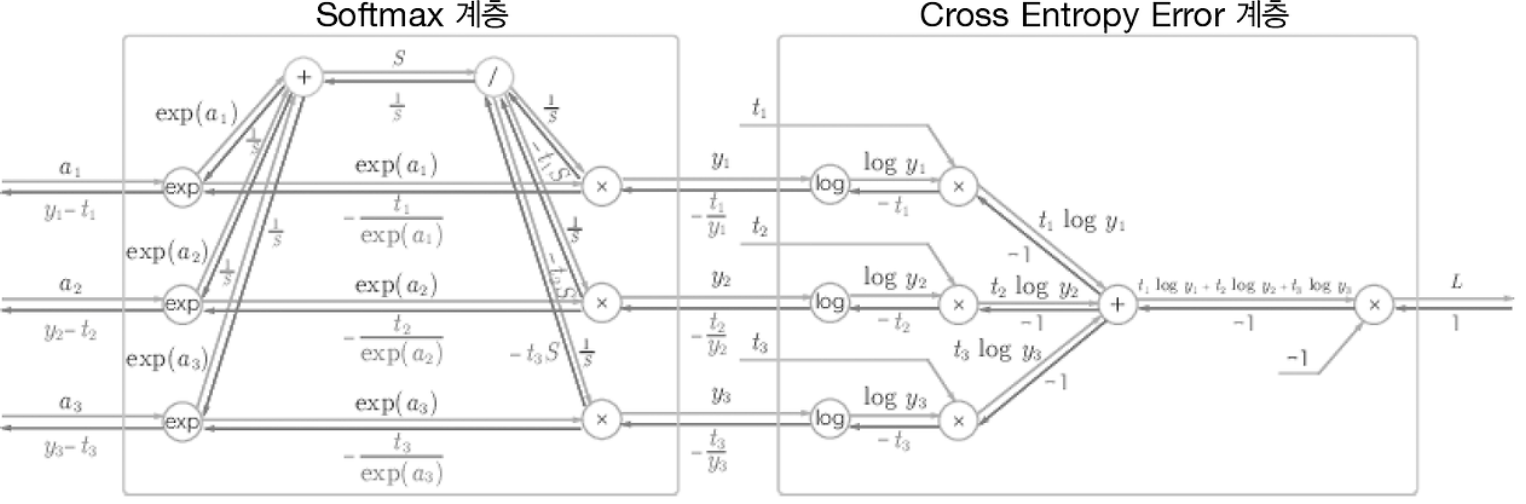

* 간소화한 softmax-with-loss 계층의 계산 그래프는 아래와 같다.

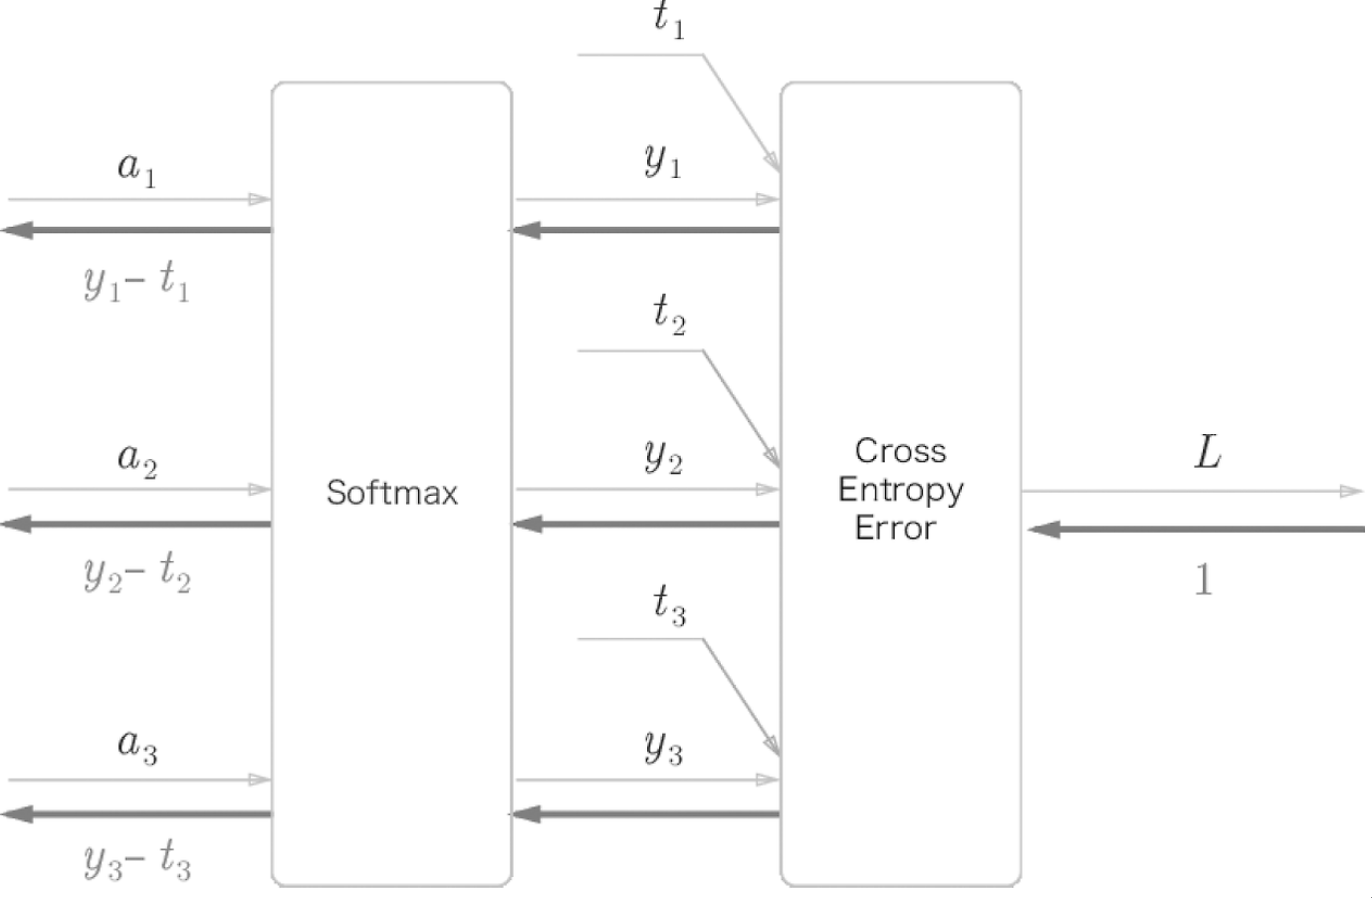

* 여기서는 3클래스 분류를 가정하고 이전계층에서 3개의 입력(점수)를 받는다.
* 그림과 같이 입력(a1, a2, a3)를 정규화하여 (y1, y2, y3)를 출력한다.
* cross entropy error 계층은 softmax의 출력과 정답레이블을 받고 이 데이터들로 부터 손실 L을 출력한다.

* 여기서 주목할 점은 소프트맥스 함수의 손실함수로 교차 엔트로피 오차를 사용하니
  역전파가 말끔히 떨어진다. (y-t) 이유는 그렇게 설계되었기 떄문이다.
  * 회귀의 출력층에서 사용하는 항등함수의 손실함수로 오차제곱항을 이용한 이유도 동일하다



In [16]:
class SoftmaxWithLoss:
    def __init__(self):
        self.loss = None # 손실함수
        self.y = None    # softmax의 출력
        self.t = None    # 정답 레이블(원-핫 인코딩 형태)

    def forward(self, x, t):
        self.t = t
        self.y = softmax(x)
        self.loss = cross_entropy_error(self.y, self.t)

        return self.loss

    def backward(self, dout=1):
        batch_size = self.t.shape[0]
        if self.t.size == self.y.size: # 정답 레이블이 원-핫 인코딩 형태일 때
            dx = (self.y - self.t) / batch_size
        else:
            dx = self.y.copy()
            dx[np.arange(batch_size), self.t] -= 1
            dx = dx / batch_size # 전파하는 값을 배치의 수로 나눠서 데이터 1갣당 오차를 앞계층에 전파하는 것을 주의!

        return dx

* 참고정리
  * Affine–ReLU–Affine 구조는
    “선형으로 섞고, 비선형으로 자르고,
    다시 선형으로 의미를 만드는”
    가장 단순하면서도 강력한 함수 근사 블록이다.

# 오차역전파법 구현하기

전체구성

1. 전제
  * 신경망에는 적응 가능한 가중치와 편향이 있고, 이 가중치와 편향을 훈련 데이터에 적응하도록 조정하는 과정을 '학습'이라고 한다.
2. 1단계 - 미니배치
  * 훈련 데이터 중 일부를 무작위로 가져온다. 이렇게 선별한 데이터를 미니배치라 하며,
  그 미니배치의 손실함수 값을 줄이는 것이 목표이다.
3. 2단계 - 기울기 산출
  * 미니배치의 손실 함수 값을 줄이기 위해 각 가중치 매개변수의 기울기를 구한다. 기울기는 손실 함수의 값을 가장 작게 하는 방향을 제시한다.
4. 3단계 - 매개변수 갱신
  * 가중치 매개변수를 기울기 방향으로 아주 조금 갱신한다.
5. 4단계 - 반복
  * 1 ~ 3단계를 반복한다.

오차역전파법을 적용한 신경망 구현하기

In [17]:
!git clone https://github.com/WegraLee/deep-learning-from-scratch.git



Cloning into 'deep-learning-from-scratch'...
remote: Enumerating objects: 1118, done.
remote: Counting objects: 100% (175/175), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 1118 (delta 142), reused 129 (delta 129), pack-reused 943 (from 2)
Receiving objects: 100% (1118/1118), 52.68 MiB | 12.60 MiB/s, done.
Resolving deltas: 100% (645/645), done.


In [18]:
import sys
sys.path.append('/content/deep-learning-from-scratch')
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

In [24]:
class TwoLayerNet:
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):

        # 가중치 초기화
        self.params = {}
        self.params['W1'] = weight_init_std * \
                            np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)
        self.params['W2'] = weight_init_std * \
                            np.random.randn(hidden_size, output_size)
        self.params['b2'] = np.zeros(output_size)

        # 계층 생성
        self.layers = OrderedDict()
        self.layers['Affine1'] = \
            Affine(self.params['W1'], self.params['b1'])
        self.layers['Relu1'] = Relu()
        self.layers['Affine2'] = \
            Affine(self.params['W2'], self.params['b2'])

        self.lastLayer = SoftmaxWithLoss()


    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    # x: 입력데이터, t: 정답레이블
    def loss(self, x, t):
        y = self.predict(x)
        return self.lastLayer.forward(y, t)

    def accuracy(self, x, t):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if t.ndim != 1 :
            t = np.argmax(t, axis=1)

        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    # x: 입력데이터, t: 정답레이블
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)

        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])

        return grads

    def gradient(self, x, t):
        # 순전파
        self.loss(x, t)

        # 역전파
        dout = 1
        dout = self.lastLayer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 결과 저장
        grads = {}
        grads['W1'] = self.layers['Affine1'].dW
        grads['b1'] = self.layers['Affine1'].db
        grads['W2'] = self.layers['Affine2'].dW
        grads['b2'] = self.layers['Affine2'].db

        return grads

* 특히 신경망의 계층을 OrderedDict에 보관하는 점이 중요하다.
* OrderedDict는 순서가 있는 딕셔너리다. '순서가 있는'이란 딕셔너리에 추가한 순서를 기억한다는 것이다.

오차역전파법으로 구한 기울기 검증하기

* 기울기를 구하는 방법으로는 수치 미분을 써서 구하는 방법과 오차역전파법을 이용하는 방법이 있다.

* 비교적 구현하기 쉬운 수치 미분에 비해 오차역전파법은 구현하기 복잡해서 종종 실수를 하기 때문에 수치 미분은 느리지만 오차역전파법을 정확히 구현했는지 확인하기 위해 필요하다.

* 두 방식으로 구한 기울기가 일치하는지 확인하는 작업을 기울기 확인이라고 한다.

In [25]:
import sys, os
import numpy as np
from dataset.mnist import load_mnist

# 데이터 로드
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

x_batch = x_train[:3]
t_batch = t_train[:3]

grad_numerical = network.numerical_gradient(x_batch, t_batch)
grad_backprop = network.gradient(x_batch, t_batch)

# 각 가중치의 절대 오차의 평균을 구함.
for key in grad_numerical.keys():
    diff = np.average( np.abs(grad_backprop[key] - grad_numerical[key]) )
    print(key + ":" + str(diff))

W1:4.867007211015743e-10
b1:2.5915756434840817e-09
W2:6.231892312819325e-09
b2:1.4033317761175112e-07


* 결과가 아주 작은 값이 나왔다면 수치 미분과 오차 역전파법으로 구한 기울기의 차이가 매우 작다고 말해주는 것이다.



오차역전파법을 사용한 학습 구현하기

In [26]:
# 데이터 읽기
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    # 기울기 계산
    #grad = network.numerical_gradient(x_batch, t_batch) # 수치 미분 방식
    grad = network.gradient(x_batch, t_batch) # 오차역전파법 방식(훨씬 빠르다)

    # 갱신
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]

    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)

    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print(train_acc, test_acc)

0.13448333333333334 0.1331
0.9033 0.908
0.9214833333333333 0.9229
0.9343166666666667 0.9343
0.94595 0.9449
0.9517166666666667 0.9497
0.9561666666666667 0.9526
0.9598833333333333 0.9548
0.9649833333333333 0.9602
0.96665 0.9627
0.9691 0.9646
0.9717833333333333 0.9647
0.9737 0.967
0.9749666666666666 0.9671
0.9768666666666667 0.9679
0.9779166666666667 0.9691
0.9777666666666667 0.9696


정리

* 계산 그래프를 이용하면 계산 과정을 시각적으로 파악할 수 있다.

* 계산 그래프의 노드는 국소적 계산으로 구성되며 국소적 계산을 조합해 전체 계산으로 구성한다.

* 계산 그래프의 순전파는 통상의 계산을 수행한다. 계산 그래프의 역전파로는 각 노드의 미분을 구할 수 있다.

* 신경망의 구성 요소를 계층으로 구현하여 기울기를 효율적으로 계산할 수 있다(오차역전파법).

* 수치 미분과 오차역전파법의 결과를 비교하면 오차역전파법의 구현에 잘못이 없는지 확인할 수 있다.